In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

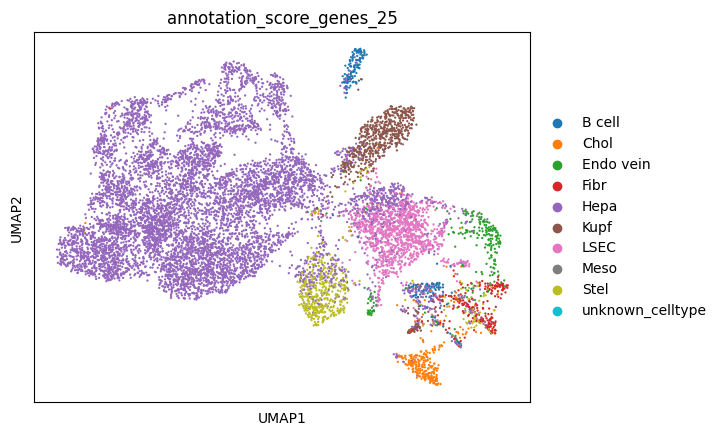

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Original score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [5]:
scoresper_cluster

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
cells,,,,,,,,,
64,0.323143,-0.020554,-0.005158,-0.018347,-0.003197,-0.038632,-0.030666,0.000000,0.000000
66,0.046678,-0.027087,-0.008058,-0.025873,0.029699,-0.041057,0.012679,-0.030594,0.052649
67,0.070567,-0.020175,0.000000,-0.012524,-0.010856,-0.020401,0.021378,-0.002682,0.061328
68,0.213175,-0.007297,0.000000,-0.020366,-0.007175,-0.022065,-0.004059,0.000000,0.018438
69,0.204004,-0.004611,0.000000,0.019998,-0.001853,0.000104,-0.008695,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
28929,0.222158,-0.019437,0.000000,0.007163,-0.001339,-0.009384,-0.011246,0.000000,0.000000
28944,0.386497,-0.026825,0.000000,-0.030517,0.007409,-0.038108,-0.037412,-0.004184,0.000000
28992,0.240235,-0.017323,-0.001431,-0.021996,0.001830,-0.042440,-0.028069,-0.002266,-0.001943


0.25


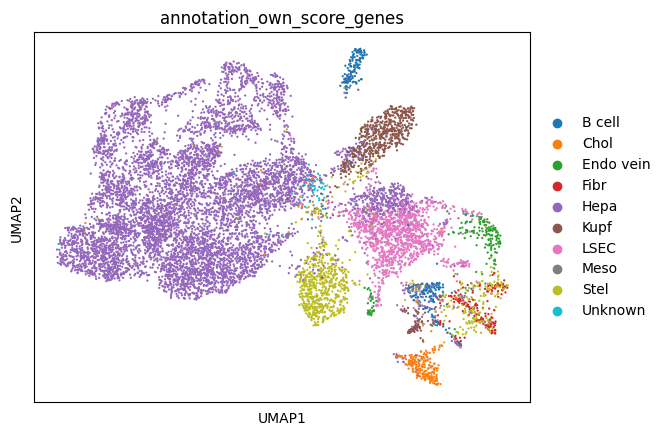

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,0.020318,NaN,NaN
1,NaN,0.055902,NaN,NaN,0.376261,NaN,0.241621,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.274330,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.154209,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,0.022204,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,0.020161,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,0.028773,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.242782,NaN,NaN


In [6]:
# own score genes with basic marker gene list
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

In [7]:
sdata.table.obs

,region,instance,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_2_genes,pct_counts_in_top_5_genes,n_counts,shapeSize,annotation_score_genes_25,cleanliness_score_genes_25,annotation_own_score_genes,score_celltype_own_score_genes,second_score_celltype_own_score_genes,cleanliness_own_score_genes
cells,,,,,,,,,,,,,,,,
64,1,1,12,2.564949,150,5.017280,74.666667,92.000000,150,2545.0,Hepa,2.000000,Hepa,0.538750,0.085765,1.450680
66,1,1,16,2.833213,38,3.663562,36.842105,68.421053,38,1257.0,Meso,0.120214,Meso,0.526007,0.376261,0.331931
67,1,1,15,2.772589,50,3.931826,52.000000,76.000000,50,3057.0,Hepa,0.140104,Meso,0.717227,0.274330,0.893337
68,1,1,8,2.197225,84,4.442651,80.952381,95.238095,84,2071.0,Hepa,1.681576,Meso,0.229382,0.199726,0.138224
69,1,1,6,1.945910,52,3.970292,67.307692,98.076923,52,1637.0,Hepa,1.642892,Hepa,0.234711,0.069145,1.089763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,1,1,8,2.197225,108,4.691348,87.037037,97.222222,108,2285.0,Hepa,1.875059,Hepa,0.313497,0.061714,1.342085
28944,1,1,11,2.484907,155,5.049856,71.612903,92.258065,155,1942.0,Hepa,1.924764,Hepa,0.511616,0.081015,1.453186
28992,1,1,10,2.397895,132,4.890349,71.969697,94.696970,132,3627.0,Hepa,1.969755,Hepa,0.354052,0.058203,1.435273


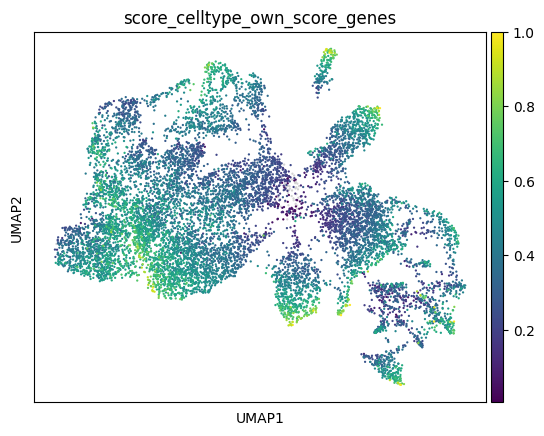

In [8]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

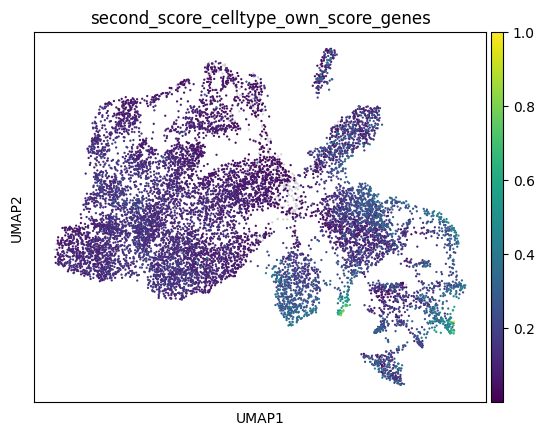

In [9]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

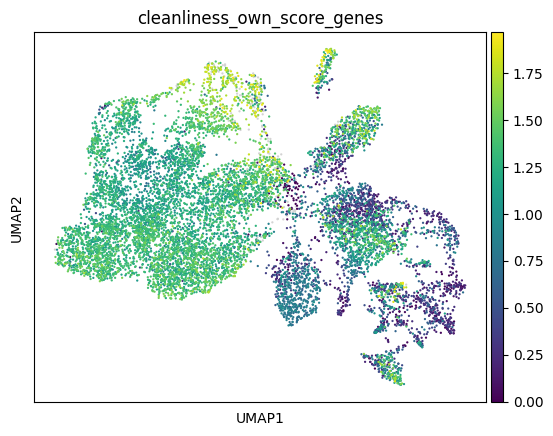

In [10]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

In [11]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

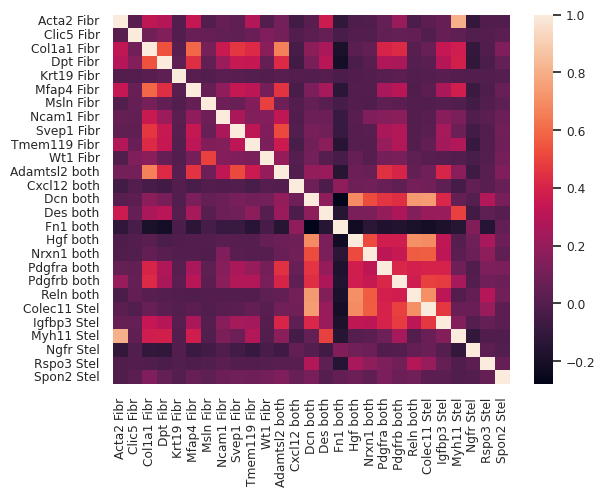

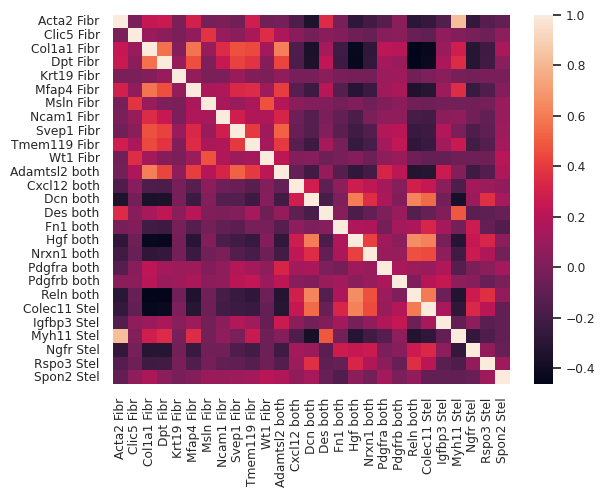

In [12]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

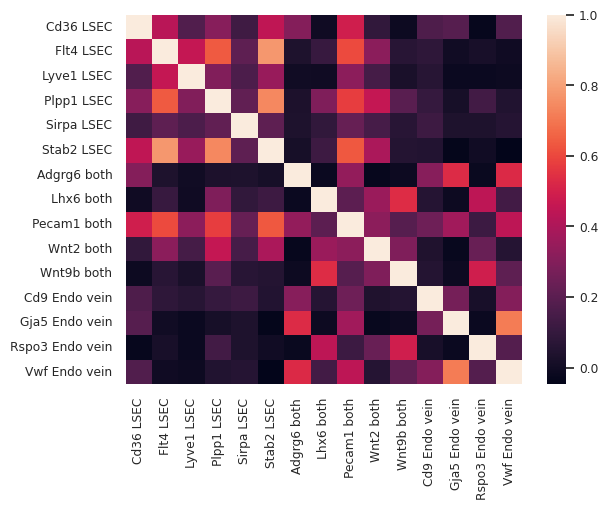

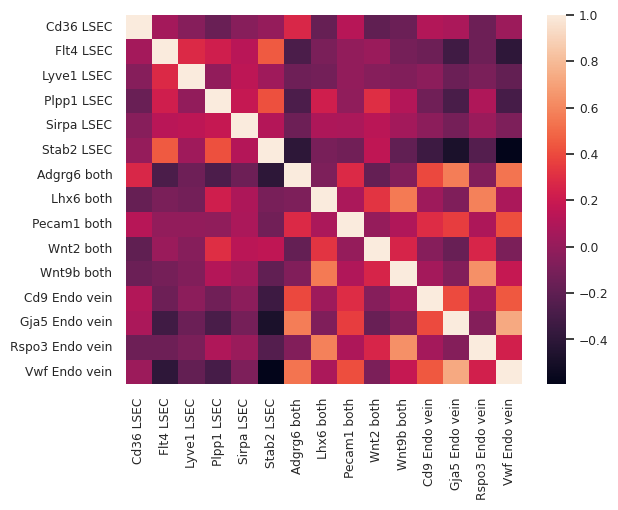

In [13]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

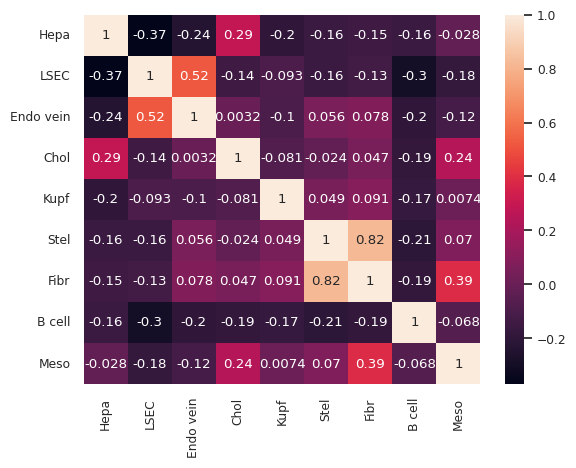

In [14]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

<AxesSubplot: xlabel='total_counts', ylabel='annotation_own_score_genes'>

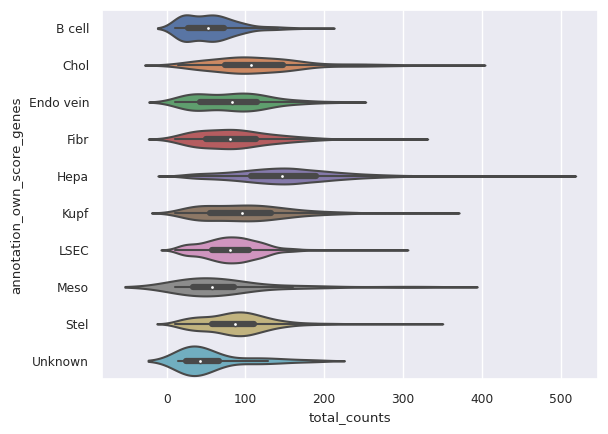

In [15]:
sdata.table.obs
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")

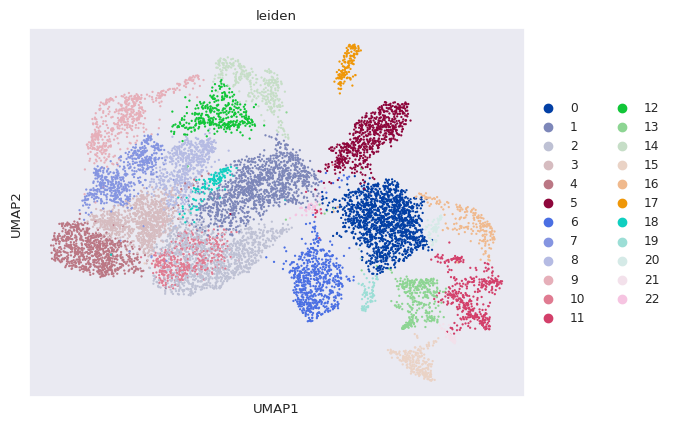

In [16]:
sc.tl.leiden(sdata.table,resolution=1,key_added='leiden')
sdata.table.obs
sc.pl.umap(sdata.table,color=['leiden'])

19
27


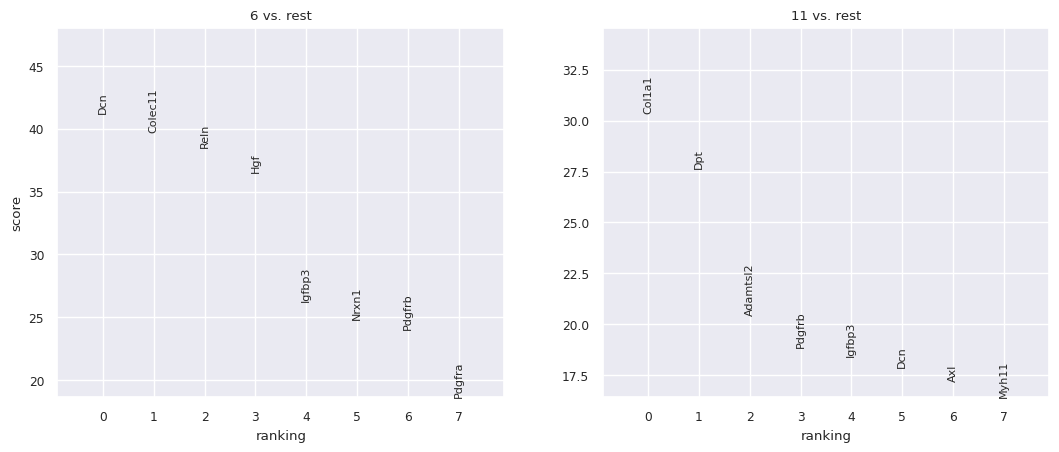

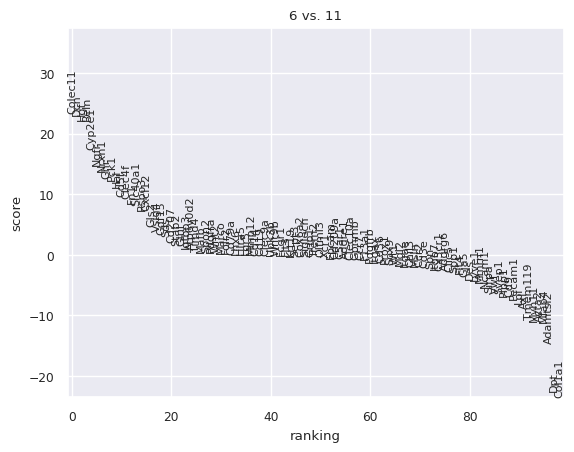

In [17]:
#Cluster 6 corresponds with the stellate cells and cluster 11 with the fibroblasts.
sdata.table.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(sdata.table, groupby='leiden', groups = ['6','11'], method = 'wilcoxon')
sc.pl.rank_genes_groups(sdata.table, n_genes=8, sharey=False, show=False)
genes = pd.DataFrame(sdata.table.uns['rank_genes_groups']['names'])
genes.rename(columns = {'6':'gene_stel','11':'gene_fibr'},inplace=True)
pvals_adj = pd.DataFrame(sdata.table.uns['rank_genes_groups']['pvals_adj'])
pvals_adj.rename(columns = {'6':'pval_adj_stel','11':'pval_adj_fibr'},inplace=True)
logf2 = pd.DataFrame(sdata.table.uns['rank_genes_groups']['logfoldchanges'])
logf2.rename(columns = {'6':'logf2_stel','11':'logf2_fibr'},inplace=True)
# make new dataframe from df
df = pd.concat([genes,pvals_adj,logf2],axis=1)
df_stel_vs_rest = df[['gene_stel','pval_adj_stel','logf2_stel']]
df_stel_vs_rest = df_stel_vs_rest[(df_stel_vs_rest['pval_adj_stel'] < 0.01) & (df_stel_vs_rest['logf2_stel'] > 0)]
df_fibr_vs_rest = df[['gene_fibr','pval_adj_fibr','logf2_fibr']]
df_fibr_vs_rest = df_fibr_vs_rest[(df_fibr_vs_rest['pval_adj_fibr'] < 0.01) & (df_fibr_vs_rest['logf2_fibr'] > 0)]
print(len(df_stel_vs_rest))
print(len(df_fibr_vs_rest))
sc.tl.rank_genes_groups(sdata.table, groupby='leiden', groups = ['6'], reference = '11', method = 'wilcoxon')
sc.pl.rank_genes_groups(sdata.table, n_genes = 99, sharey=False, show=False)
genes = pd.DataFrame(sdata.table.uns['rank_genes_groups']['names'])
genes.rename(columns = {'6':'gene'},inplace=True)
pvals_adj = pd.DataFrame(sdata.table.uns['rank_genes_groups']['pvals_adj'])
pvals_adj.rename(columns = {'6':'pval_adj'},inplace=True)
logf2 = pd.DataFrame(sdata.table.uns['rank_genes_groups']['logfoldchanges'])
logf2.rename(columns = {'6':'logf2'},inplace=True)
df_stel_vs_fibr = pd.concat([genes,pvals_adj,logf2],axis=1)
# only keep rows with adj_p_value < 0.01
df_stel_vs_fibr = df_stel_vs_fibr[df_stel_vs_fibr['pval_adj'] < 0.01]
print(len(df_stel_vs_fibr))

In [19]:
df_mg = pd.read_csv(path_mg,index_col=0)
mg_stel = df_mg.index[df_mg['Stel']==1].tolist()
mg_fibr = df_mg.index[df_mg['Fibr']==1].tolist()
mg_stel_unique = [x for x in mg_stel if x not in mg_fibr]
mg_fibr_unique = [x for x in mg_fibr if x not in mg_stel]
mg_overlap = [x for x in mg_stel if x in mg_fibr]
print(mg_overlap)
# select only the genes of df in mg_overlap
df_overlap = df_stel_vs_fibr[df_stel_vs_fibr['gene'].isin(mg_overlap)]
print(df_overlap)
# It seems that most of the overlapping genes (except 'Pdgfra' and 'Pdgfrb') are clearly more expressed in one of the 2 cell types
# 'Dcn', 'Hgf', 'Reln', 'Nrxn1', 'Fn1' and 'Cxcl12' --> rather stellate cell markers
# 'Des' and 'Adamtsl' --> rather fibroblast markers
candidates_stel = df_overlap[df_overlap['logf2']>0]['gene'].to_list()
candidates_fibr = df_overlap[df_overlap['logf2']<0]['gene'].to_list()


['Adamtsl2', 'Cxcl12', 'Dcn', 'Des', 'Fn1', 'Hgf', 'Nrxn1', 'Pdgfra', 'Pdgfrb', 'Reln']
        gene       pval_adj     logf2
1        Dcn  2.497754e-115  2.165673
2        Hgf  2.956395e-108  3.391846
3       Reln  6.969158e-108  2.986168
6      Nrxn1   1.534284e-42  2.591857
12       Fn1   4.121365e-17  0.734445
15    Cxcl12   1.273964e-12  1.936772
80       Des   1.220548e-04 -1.302484
96  Adamtsl2   1.962044e-47 -4.029603


In [20]:
# analyze candidates_stel
print(candidates_stel)
print(df_stel_vs_rest[df_stel_vs_rest['gene_stel'].isin(candidates_stel)])
print(df_fibr_vs_rest[df_fibr_vs_rest['gene_fibr'].isin(candidates_stel)])
# maybe not a good idea to change 'Dcn' or 'Reln' to marker genes of stellate cells because they clearly also help to discriminate fibroblasts from all cells
# 'Hgf', 'Nrxn1', 'Fn1' and 'Cxcl12' do not help a lot to discriminate fibroblasts from all cells, so we can maybe drop these as fibroblast markers

['Dcn', 'Hgf', 'Reln', 'Nrxn1', 'Fn1', 'Cxcl12']
   gene_stel  pval_adj_stel  logf2_stel
0        Dcn   0.000000e+00    4.786872
2       Reln   0.000000e+00    5.535587
3        Hgf  1.341150e-290    4.691319
5      Nrxn1  7.842432e-135    5.245409
13    Cxcl12   1.255850e-10    0.991473
   gene_fibr  pval_adj_fibr  logf2_fibr
5        Dcn   1.550690e-70    1.568192
24      Reln   1.672602e-04    0.835707


In [27]:
# analyze candidates_fibr
print(candidates_fibr)
print(df_stel_vs_rest[df_stel_vs_rest['gene_stel'].isin(candidates_fibr)])
print(df_fibr_vs_rest[df_fibr_vs_rest['gene_fibr'].isin(candidates_fibr)]) 
# maybe not a good idea to change 'Des' or 'Adamtsl2' to marker genes of only fibroblasts because they clearly also help to discriminate stellate cells from all cells


['Des', 'Adamtsl2']
   gene_stel  pval_adj_stel  logf2_stel
12       Des   6.811264e-15    2.190847
20  Adamtsl2   5.890115e-03    0.412703
   gene_fibr  pval_adj_fibr  logf2_fibr
2   Adamtsl2   1.160625e-91    6.358274
13       Des   9.909284e-28    3.779067


16
20
34


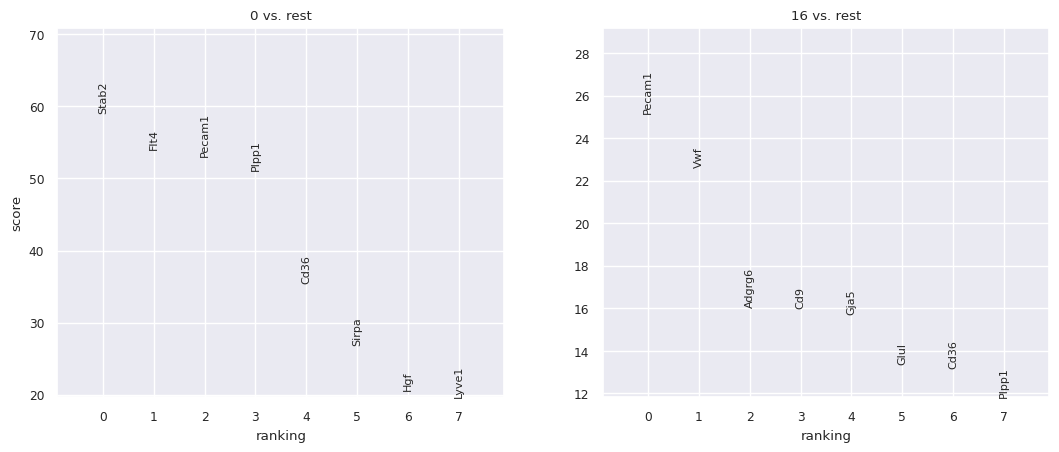

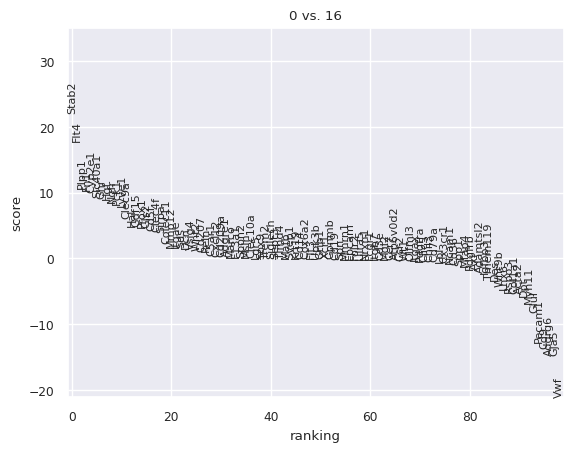

In [31]:
# Cluster 0 corresponds with the LSECs and clusters 16 and 19 with the Endo vein cells
sdata.table.uns['log1p']["base"] = None
a = sdata.table.obs['leiden']
a = a.replace('19','16')
sdata.table.obs['leiden_mod'] = a
sc.tl.rank_genes_groups(sdata.table, groupby='leiden_mod', groups = ['0','16'], method = 'wilcoxon')
sc.pl.rank_genes_groups(sdata.table, n_genes=8, sharey=False, show=False)
genes = pd.DataFrame(sdata.table.uns['rank_genes_groups']['names'])
genes.rename(columns = {'0':'gene_lsec','16':'gene_endo'},inplace=True)
pvals_adj = pd.DataFrame(sdata.table.uns['rank_genes_groups']['pvals_adj'])
pvals_adj.rename(columns = {'0':'pval_adj_lsec','16':'pval_adj_endo'},inplace=True)
logf2 = pd.DataFrame(sdata.table.uns['rank_genes_groups']['logfoldchanges'])
logf2.rename(columns = {'0':'logf2_lsec','16':'logf2_endo'},inplace=True)
# make new dataframe from df
df = pd.concat([genes,pvals_adj,logf2],axis=1)
df_lsec_vs_rest = df[['gene_lsec','pval_adj_lsec','logf2_lsec']]
df_lsec_vs_rest = df_lsec_vs_rest[(df_lsec_vs_rest['pval_adj_lsec'] < 0.01) & (df_lsec_vs_rest['logf2_lsec'] > 0)]
df_endo_vs_rest = df[['gene_endo','pval_adj_endo','logf2_endo']]
df_endo_vs_rest = df_endo_vs_rest[(df_endo_vs_rest['pval_adj_endo'] < 0.01) & (df_endo_vs_rest['logf2_endo'] > 0)]
print(len(df_lsec_vs_rest))
print(len(df_endo_vs_rest))
sc.tl.rank_genes_groups(sdata.table, groupby='leiden_mod', groups = ['0'], reference = '16', method = 'wilcoxon')
sc.pl.rank_genes_groups(sdata.table, n_genes = 99, sharey=False, show=False)
genes = pd.DataFrame(sdata.table.uns['rank_genes_groups']['names'])
genes.rename(columns = {'0':'gene'},inplace=True)
pvals_adj = pd.DataFrame(sdata.table.uns['rank_genes_groups']['pvals_adj'])
pvals_adj.rename(columns = {'0':'pval_adj'},inplace=True)
logf2 = pd.DataFrame(sdata.table.uns['rank_genes_groups']['logfoldchanges'])
logf2.rename(columns = {'0':'logf2'},inplace=True)
df_lsec_vs_endo = pd.concat([genes,pvals_adj,logf2],axis=1)
# only keep rows with adj_p_value < 0.01
df_lsec_vs_endo = df_lsec_vs_endo[df_lsec_vs_endo['pval_adj'] < 0.01]
print(len(df_lsec_vs_endo))

In [34]:
df_mg = pd.read_csv(path_mg,index_col=0)
mg_endo = df_mg.index[df_mg['Endo vein']==1].tolist()
mg_lsec = df_mg.index[df_mg['LSEC']==1].tolist()
mg_endo_unique = [x for x in mg_endo if x not in mg_lsec]
mg_lsec_unique = [x for x in mg_lsec if x not in mg_endo]
mg_overlap = [x for x in mg_endo if x in mg_lsec]
print(mg_overlap)
# select only the genes of df in mg_overlap
df_overlap = df_lsec_vs_endo[df_lsec_vs_endo['gene'].isin(mg_overlap)]
print(df_overlap)
# It seems that most overlapping genes (except 'Wnt2') are clearly less expressed in the LSECs than in the Endo vein cells
candidates_endo = df_overlap[df_overlap['logf2']<0]['gene'].to_list()

['Adgrg6', 'Lhx6', 'Pecam1', 'Wnt2', 'Wnt9b']
      gene      pval_adj     logf2
86   Wnt9b  8.600406e-05 -4.929382
87    Lhx6  8.966487e-06 -3.615627
94  Pecam1  3.864476e-36 -0.826149
96  Adgrg6  1.499459e-47 -5.564631


In [36]:
# analyze candidates_endo
print(candidates_endo)
print(df_endo_vs_rest[df_endo_vs_rest['gene_endo'].isin(candidates_endo)])
print(df_lsec_vs_rest[df_lsec_vs_rest['gene_lsec'].isin(candidates_endo)])
# maybe not a good idea to change 'Pecam1' to only a marker genes of endo vein cells because they clearly also help to discriminate LSECs from all cells
# 'Adgrg6', 'Lhx6' and 'Wnt9b' do not help a lot to discriminate LSECs from all cells, so we can maybe drop these as LSEC markers

['Wnt9b', 'Lhx6', 'Pecam1', 'Adgrg6']
   gene_endo  pval_adj_endo  logf2_endo
0     Pecam1  6.398066e-138    3.377063
2     Adgrg6   1.165971e-56    6.424109
11      Lhx6   1.792966e-08    5.953460
14     Wnt9b   4.867456e-06    6.449321
  gene_lsec  pval_adj_lsec  logf2_lsec
2    Pecam1            0.0    3.342479


In [39]:
# Update marker gene list based on this information:
# 'Hgf', 'Nrxn1', 'Fn1' and 'Cxcl12' dropped as fibroblast marker genes (but are still marker genes of stellate cells)
# 'Adgrg6', 'Lhx6' and 'Wnt9b' dropped as LSEC markers (but are still marker genes of endo vein cells)
# load df from .csv from path_mg
df_mg = pd.read_csv(path_mg,index_col=0)
fibro_drop = ['Hgf', 'Nrxn1', 'Fn1', 'Cxcl12']
lsec_drop = ['Adgrg6', 'Lhx6', 'Wnt9b']
df_mg.loc[fibro_drop,'Fibr'] = 0
df_mg.loc[lsec_drop,'LSEC'] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified.csv")

0.25


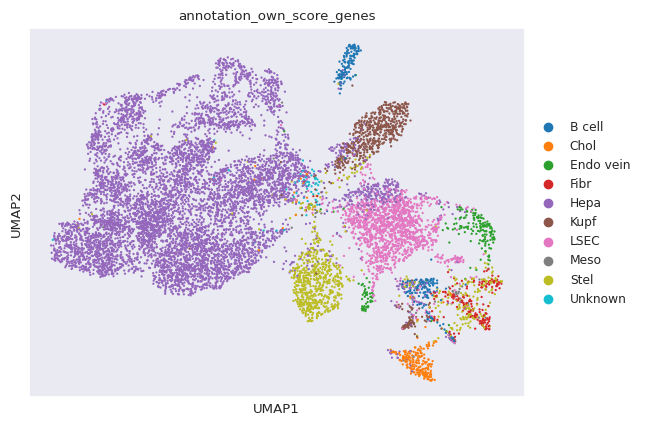

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.520485
Chol                         2.155326
Endo vein                    1.843605
Fibr                         1.727823
Hepa                        65.024938
Kupf                         5.842537
LSEC                        12.513359
Meso                         0.409690
Stel                         7.454578
Unknown                      0.507659


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,NaN,0.021096,0.085765,0.021767,NaN,NaN,NaN,NaN
1,NaN,0.073657,NaN,NaN,0.376261,NaN,0.264054,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.019384,NaN,0.297169,NaN,0.717227
3,0.199726,NaN,NaN,0.036456,NaN,NaN,0.150841,NaN,0.229382
4,0.234711,NaN,NaN,0.069145,NaN,0.056901,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.313497,NaN,NaN,0.059235,NaN,0.061714,NaN,NaN,NaN
11224,0.511616,NaN,NaN,0.081015,0.051679,0.072720,NaN,NaN,NaN
11225,0.354052,NaN,NaN,0.058203,0.049886,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.063038,0.602880,0.156434,NaN,NaN


In [40]:
path_mg_mod = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified.csv"
scores = own_score_genes(sdata,path_mg_mod)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


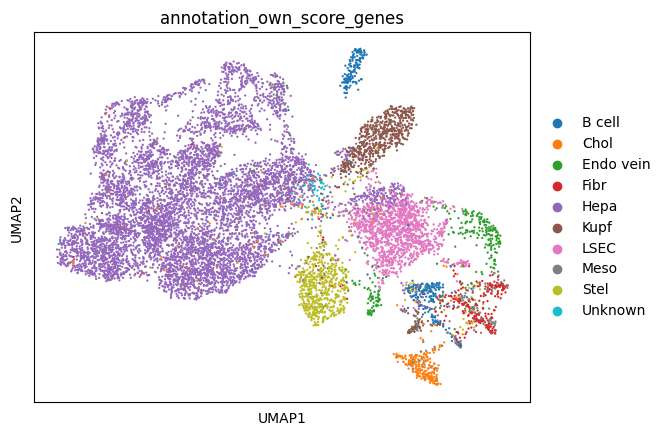

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.188457
Chol                         2.885643
Endo vein                    2.502672
Fibr                         2.440328
Hepa                        61.943356
Kupf                         6.074100
LSEC                        12.076950
Meso                         2.529391
Stel                         5.842537
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.792675,NaN,0.075063,0.287679,0.048253,NaN,0.062388,NaN,NaN
1,NaN,0.116998,NaN,NaN,0.834091,NaN,0.741897,NaN,3.669726
2,NaN,NaN,NaN,NaN,0.042971,NaN,0.842330,NaN,5.003789
3,0.288355,NaN,NaN,0.122283,NaN,NaN,0.473498,NaN,1.600303
4,0.340398,NaN,NaN,0.231933,NaN,0.092828,0.068176,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.457597,NaN,NaN,0.198690,NaN,0.101395,0.061905,NaN,NaN
11224,0.752311,NaN,NaN,0.271746,0.114560,0.120980,0.088347,NaN,NaN
11225,0.517924,NaN,NaN,0.195229,0.110587,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.139741,1.064415,0.745462,NaN,NaN


In [ ]:
scores = own_score_genes(sdata,path_mg,scale_score_q=2)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


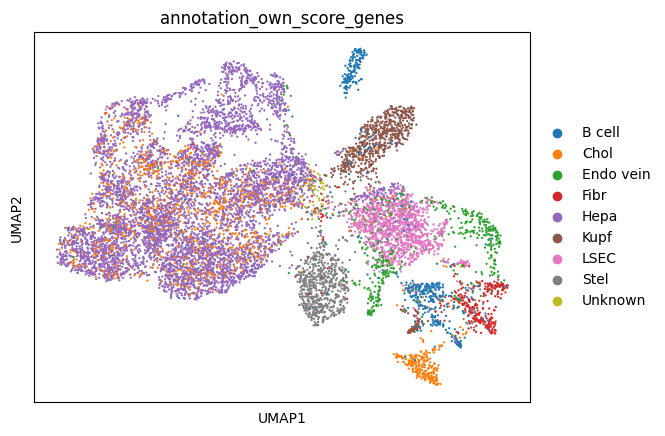

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.880656
Chol                        13.412896
Endo vein                    4.729248
Fibr                         2.841112
Hepa                        50.641254
Kupf                         6.519416
LSEC                        10.509441
Stel                         5.949412
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.864947,NaN,0.162227,0.497970,0.083424,NaN,0.078924,NaN,NaN
1,NaN,0.153802,NaN,NaN,1.442064,NaN,1.095727,NaN,0.526007
2,NaN,NaN,NaN,NaN,0.074293,NaN,1.246012,NaN,0.717227
3,0.290503,NaN,NaN,0.211671,NaN,NaN,0.694100,NaN,0.229382
4,0.349783,NaN,NaN,0.401475,NaN,0.120230,0.087586,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.483278,NaN,NaN,0.343932,NaN,0.133739,0.078202,NaN,NaN
11224,0.818970,NaN,NaN,0.470390,0.198064,0.164627,0.117769,NaN,NaN
11225,0.551993,NaN,NaN,0.337939,0.191194,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.241598,1.652483,1.101062,NaN,NaN


In [ ]:
scores = own_score_genes(sdata,path_mg,scale_score_q=5)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


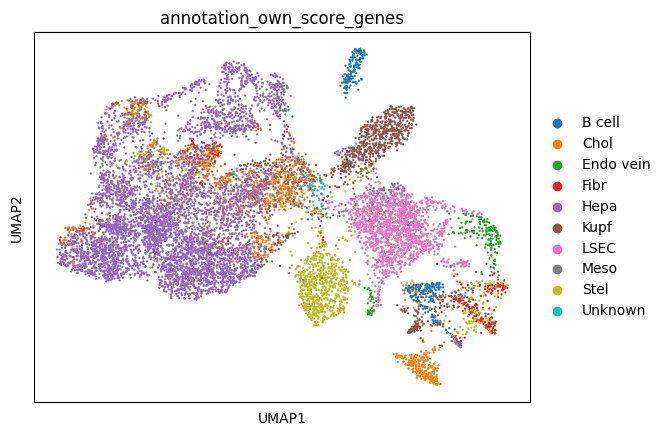

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.215176
Chol                         9.342715
Endo vein                    2.671892
Fibr                         3.696117
Hepa                        48.147488
Kupf                         8.363021
LSEC                        14.392590
Meso                         1.193445
Stel                         8.460990
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.321667,NaN,-0.007951,0.009958,-0.023930,NaN,-0.031415,NaN,NaN
1,NaN,-0.010820,NaN,NaN,0.347125,NaN,0.201574,NaN,0.521940
2,NaN,NaN,NaN,NaN,-0.026424,NaN,0.236010,NaN,0.714801
3,-0.176916,NaN,NaN,-0.043439,NaN,NaN,0.109546,NaN,0.222771
4,-0.125464,NaN,NaN,-0.008039,NaN,-0.050863,-0.029430,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.009599,NaN,NaN,-0.018771,NaN,-0.045499,-0.031580,NaN,NaN
11224,0.281763,NaN,NaN,0.004815,0.007379,-0.033235,-0.022514,NaN,NaN
11225,0.050042,NaN,NaN,-0.019889,0.005503,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.019269,0.557504,0.202796,NaN,NaN


In [ ]:

scores = own_score_genes(sdata,path_mg,scale_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


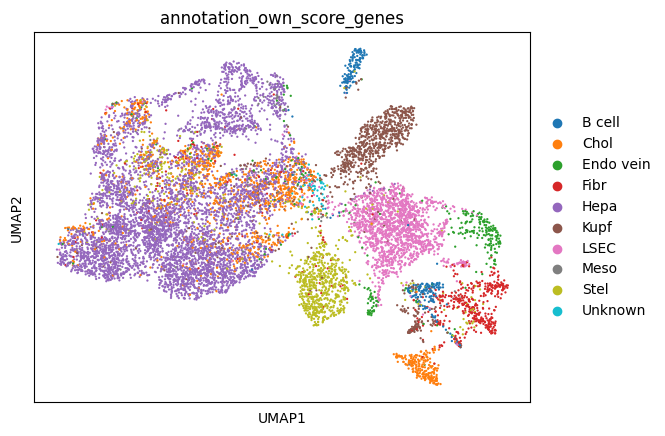

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.698611
Chol                        11.435696
Endo vein                    2.965800
Fibr                         4.862843
Hepa                        46.170289
Kupf                         8.478803
LSEC                        14.089776
Meso                         0.855005
Stel                         7.926612
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.724390,NaN,-0.428053,0.390216,-1.935285,NaN,-2.852406,NaN,NaN
1,NaN,-0.451450,NaN,NaN,28.073285,NaN,18.302675,NaN,15.658499
2,NaN,NaN,NaN,NaN,-2.136977,NaN,21.429431,NaN,21.444426
3,-3.148392,NaN,NaN,-1.702138,NaN,NaN,9.946627,NaN,6.683257
4,-2.232764,NaN,NaN,-0.314997,NaN,-2.657646,-2.672196,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.170817,NaN,NaN,-0.735539,NaN,-2.377381,-2.867433,NaN,NaN
11224,5.014245,NaN,NaN,0.188656,0.596784,-1.736590,-2.044225,NaN,NaN
11225,0.890555,NaN,NaN,-0.779333,0.445038,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,1.558340,29.130346,18.413673,NaN,NaN


In [ ]:

scores = own_score_genes(sdata,path_mg,scale_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


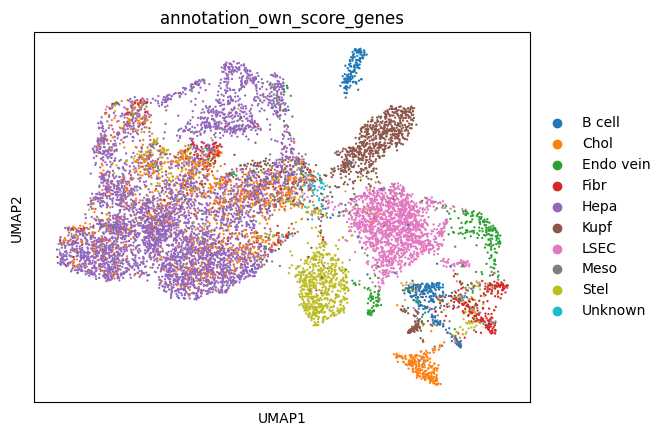

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.651585
Chol                        12.442109
Endo vein                    3.322052
Fibr                         3.705023
Hepa                        43.961525
Kupf                         8.425365
LSEC                        14.071963
Meso                         1.923762
Stel                         7.980050
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.572439,NaN,-0.047561,0.055745,-0.120955,NaN,-0.135829,NaN,NaN
1,NaN,-0.041041,NaN,NaN,1.754580,NaN,0.871556,NaN,3.131700
2,NaN,NaN,NaN,NaN,-0.133561,NaN,1.020449,NaN,4.288885
3,-0.314839,NaN,NaN,-0.243163,NaN,NaN,0.473649,NaN,1.336651
4,-0.223276,NaN,NaN,-0.045000,NaN,-0.166103,-0.127247,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.017082,NaN,NaN,-0.105077,NaN,-0.148586,-0.136544,NaN,NaN
11224,0.501425,NaN,NaN,0.026951,0.037299,-0.108537,-0.097344,NaN,NaN
11225,0.089055,NaN,NaN,-0.111333,0.027815,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.097396,1.820647,0.876842,NaN,NaN


In [ ]:

scores = own_score_genes(sdata,path_mg,scale_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


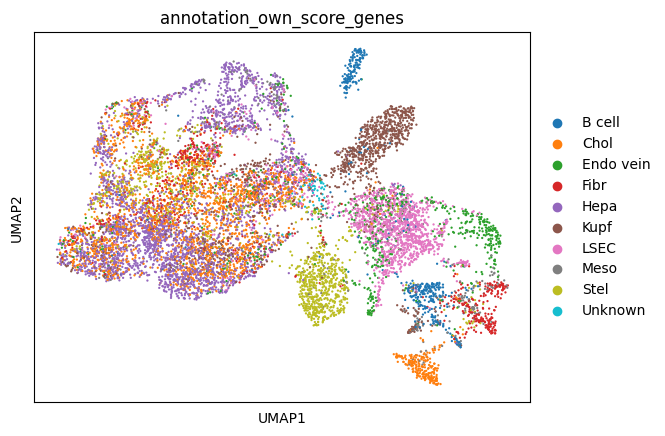

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.390809
Chol                        18.694336
Endo vein                    6.341290
Fibr                         6.020663
Hepa                        24.884218
Kupf                        11.863199
LSEC                        13.564304
Meso                         2.858924
Stel                        10.865693
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.874243,NaN,0.725196,0.649092,0.635910,NaN,0.357410,NaN,NaN
1,NaN,0.751648,NaN,NaN,0.969006,NaN,0.958586,NaN,0.998308
2,NaN,NaN,NaN,NaN,0.601443,NaN,0.969451,NaN,0.999198
3,0.288119,NaN,NaN,0.303349,NaN,NaN,0.921179,NaN,0.987887
4,0.340043,NaN,NaN,0.536427,NaN,0.378874,0.402031,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.481831,NaN,NaN,0.467314,NaN,0.427859,0.353758,NaN,NaN
11224,0.839330,NaN,NaN,0.615960,0.845654,0.531172,0.544353,NaN,NaN
11225,0.561275,NaN,NaN,0.460189,0.840399,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.868988,0.984147,0.959209,NaN,NaN


In [ ]:

scores = own_score_genes(sdata,path_mg,scale_score='Rank')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores